# Assessment of Amine-based CCS in LA on air quality and public health

Authors: Yunha Lee, Qasim Mehdi, Daniel Rodriguez, Kat Sale, Bjorn Brooks, Amy Jordan

* Contact: yunha.lee@carbonsolutionsllc.com


![](https://scx2.b-cdn.net/gfx/news/hires/2018/1-emissions.jpg)

Image Source: https://phys.org/news/2019-10-carbon-capture.html (Credit: CC0 Public Domain)

## Introduction & Summary


Decarbonization strategies have emerged as an innovative approach to reduce carbon dioxide (CO2) emissions and achieve net zero goals. These strategies include carbon capture and storage (CCS), industrial electrification, facility decommissioning, and fuel-switching to options such as clean hydrogen. Along with CO2 emissions, decarbonization also affects the emissions of conventional air pollutants such as particulate matter (PM), nitrogen oxides (NOx), and sulfur oxides (SOx). With the growing interest in advancing environmental justice through climate policy, it is crucial to understand the socioeconomic impacts of decarbonization and the social costs associated with each decarbonization technology.

In this study, we estimate changes in air pollutant emissions resulting from amine-based CCS applied to industrial point-source facilities across the U.S., using the CO2 National Capture Opportunities and Readiness Database (CO2NCORD). This CO2NCORD tool estimates capturable CO2 emissions and the cost-per-tonne for industrial point sources. We use the INMAP (Intervention Model for Air Pollution) model to compute the annual PM2.5 concentration with the modified emissions by amine-based CCS and the BenMAP-CE (Environmental Benefits Mapping and Analysis Program - Community Edition) model to estimate the health impacts of amine-based CCS in the U.S., as well as the monetized values of those health impacts. We estimate the overall cost of amine-based CCS by incorporating the valuation results from BenMAP-CE into the cost-per-tonne from CO2NCORD.

The overall goals of our study are to assess the socioeconomic impacts of decarbonization strategies, focused on air quality, public health, and equity, and to identify effective decarbonization technologies for specific regions.


Data analysis
1. Faciltiy emissions analysis 
    - why some facilities have higher NH3 emissions than others?
    - Identify county with high NH3 facilities
    - What is the main factor to increase NH3? 
2. INMAP PM2.5 analysis
    - Changes of PM2.5 by LA CCS using INMAP
    - Changes of PM2.5 from the facilities distance? 
3. BenMAP health impact analysis
    - Changes in mortality and morbidity by LA CCS (with and without NH3 emissions)
    - Impact on which race and which vulnerable commuties
    - Compare Valuataion cost (social cost and CCS operational cost)
    



# 2. CCS Faciltiy emissions analysis 

In [38]:
import geopandas as gpd

# read base and sens emission scenarios
gdf_CS_emis = gpd.read_file('/Users/yunhalee/Documents/LOCAETA/CS_emissions/new_NEI_point_oilgas_ptegu_ptnonimps_CCS.shp')

# Reset index to ensure proper comparison
gdf_CS_emis.reset_index(drop=True, inplace=True)

gdf_CS_emis.head()

,FIPS,SCC,VOC_old,NOx_old,NH3_old,SOx_old,PM2_5_old,height,diam,temp,velocity,EIS_ID,VOC,NOx,NH3,SOx,PM2_5,geometry
0,06031,20200201,0.0433,2.549257,1.126784,0.053919,0.291721,12.192,0.6096,138.888890,15.24,16711,0.0433,2.549257,1.126784,0.053919,0.291721,POINT (-2023790.714 -159536.923)
1,06031,20100201,0.0612,1.286907,0.476615,0.034398,0.219812,12.192,0.6096,138.888890,15.24,17611,0.0612,1.286907,0.476615,0.034398,0.219812,POINT (-2000782.581 -162054.741)
2,06013,20100201,0.0000,85.243000,0.000000,6.901000,0.000000,12.192,0.6096,138.888890,15.24,148911,0.0000,85.243000,0.000000,6.901000,0.000000,POINT (-2139997.488 76811.449)
3,06013,20300203,0.0000,121.232000,0.000000,8.240000,0.000000,12.192,0.6096,138.888890,15.24,150711,0.0000,121.232000,0.000000,8.240000,0.000000,POINT (-2138008.892 74564.843)
4,05119,20100201,2.2338,203.600000,0.000000,6.014635,8.208184,0.000,0.0000,255.372222,0.00,210811,2.2338,203.600000,0.000000,6.014635,8.208184,POINT (436639.837 -587000.143)


In [46]:
def subset_data(final_df, state_fips=None):
    if state_fips:
        # Match the first two digits of FIPS with State FIPS code
        return final_df[final_df['FIPS'].astype(str).str[:2] == str(state_fips)]
    return final_df

# Dictionary to loop over
regions = {"LA": '22'} #, "Nation": None}

final_df = gpd.GeoDataFrame(gdf_CS_emis, geometry= "geometry")
type(final_df)

# Loop over the regions dictionary and process the data
for region_name, state_fips in regions.items():
    
    # Subset the final DataFrame based on the chosen state or national
    final_df_subset = subset_data(final_df, state_fips)

    print(f"Processing data for: {region_name}")
    
final_df_subset.head()

Processing data for: LA


,FIPS,SCC,VOC_old,NOx_old,NH3_old,SOx_old,PM2_5_old,height,diam,temp,velocity,EIS_ID,VOC,NOx,NH3,SOx,PM2_5,geometry
536,22033,10100501,0.00000,0.00,5.0160,0.000000,0.000000,45.8724,3.3528,155.55556,12.92352,5160611,1.357207,0.000000,22.909774,0.000000,0.000000,POINT (559622.909 -1037301.654)
537,22033,10100604,21.47000,348.55,0.0000,5.120000,29.660000,45.8724,3.3528,155.55556,12.92352,5160611,22.515279,252.823411,48.581855,0.053820,1.689358,POINT (559622.909 -1037301.654)
538,22033,20200203,12.84000,882.54,103.9321,5.510000,20.790000,53.3400,4.8768,172.22222,25.81656,5160611,13.465123,640.157145,474.693163,0.057919,1.184146,POINT (559553.202 -1037358.769)
539,22033,20300203,18.94000,361.80,0.0000,8.520000,59.520000,53.3400,4.8768,111.11111,23.89632,5160611,19.862105,262.434400,48.581855,0.089559,3.390108,POINT (559506.192 -1037318.091)
545,22109,10100601,0.99805,28.80,0.5246,0.108878,1.379123,18.8976,2.1336,194.44444,18.89760,5192511,1.010126,20.880000,3.298766,0.001089,0.735010,POINT (611355.313 -1135805.652)


In [47]:
def subset_pollutants_with_difference(df, pollutants):
    mask = False  # Initialize a mask to filter rows
    for pollutant in pollutants:
        col_current = pollutant
        col_old = f'{pollutant}_old'
        
        if col_current in df.columns and col_old in df.columns:
            # Check where the pollutant and its "_old" version differ
            mask |= (df[col_current] != df[col_old])

    # Subset the dataframe based on the mask
    return df[mask]

pollutants = ['VOC', 'NOx', 'NH3', 'SOx', 'PM2_5']
subset_df = subset_pollutants_with_difference(final_df_subset, pollutants)

subset_df.head()

,FIPS,SCC,VOC_old,NOx_old,NH3_old,SOx_old,PM2_5_old,height,diam,temp,velocity,EIS_ID,VOC,NOx,NH3,SOx,PM2_5,geometry
536,22033,10100501,0.00000,0.00,5.0160,0.000000,0.000000,45.8724,3.3528,155.55556,12.92352,5160611,1.357207,0.000000,22.909774,0.000000,0.000000,POINT (559622.909 -1037301.654)
537,22033,10100604,21.47000,348.55,0.0000,5.120000,29.660000,45.8724,3.3528,155.55556,12.92352,5160611,22.515279,252.823411,48.581855,0.053820,1.689358,POINT (559622.909 -1037301.654)
538,22033,20200203,12.84000,882.54,103.9321,5.510000,20.790000,53.3400,4.8768,172.22222,25.81656,5160611,13.465123,640.157145,474.693163,0.057919,1.184146,POINT (559553.202 -1037358.769)
539,22033,20300203,18.94000,361.80,0.0000,8.520000,59.520000,53.3400,4.8768,111.11111,23.89632,5160611,19.862105,262.434400,48.581855,0.089559,3.390108,POINT (559506.192 -1037318.091)
545,22109,10100601,0.99805,28.80,0.5246,0.108878,1.379123,18.8976,2.1336,194.44444,18.89760,5192511,1.010126,20.880000,3.298766,0.001089,0.735010,POINT (611355.313 -1135805.652)


In [77]:
# Find the case where SOx is higher than SOx_old
if 'SOx' in subset_df.columns and 'SOx_old' in subset_df.columns:
    filtered_SOx_df = subset_df[subset_df['SOx'] > subset_df['SOx_old']]

filtered_SOx_df.head()

,FIPS,SCC,VOC_old,NOx_old,NH3_old,SOx_old,PM2_5_old,height,diam,temp,velocity,EIS_ID,VOC,NOx,NH3,SOx,PM2_5,geometry,percent_change
13980,22119,10200603,7.970000,7.950000,0.0,19.390000,0.220000,3.048,0.15240,277.77778,12.19200,8019911,7.980835,5.908253,0.945890,21.370000,0.210485,POINT (339024.343 -792524.971),-4.324895
278852,22019,30190014,1.190847,13.600003,0.0,0.048344,0.779488,15.240,1.34417,277.77778,15.03609,17905711,1.196321,14.150003,1.605996,2.028344,0.718776,POINT (357257.004 -1078303.820),-7.788684


In [78]:
# Find the case where NOx is higher than NOx_old
if 'NOx' in subset_df.columns and 'NOx_old' in subset_df.columns:
    filtered_NOx_df = subset_df[subset_df['NOx'] > subset_df['NOx_old']]

filtered_NOx_df.head()

,FIPS,SCC,VOC_old,NOx_old,NH3_old,SOx_old,PM2_5_old,height,diam,temp,velocity,EIS_ID,VOC,NOx,NH3,SOx,PM2_5,geometry,percent_change
278852,22019,30190014,1.190847,13.600003,0.0,0.048344,0.779488,15.24,1.34417,277.77778,15.03609,17905711,1.196321,14.150003,1.605996,2.028344,0.718776,POINT (357257.004 -1078303.820),-7.788684


In [69]:
import contextily as ctx
import matplotlib.colors as mcolors

# Function to plot the percent change of each pollutant and its "_old" version with a basemap
def plot_spatial_distribution_percent_change_with_basemap(gdf, output_dir):
    pollutants = ['VOC', 'NOx', 'NH3', 'SOx', 'PM2_5']
    
    # Ensure the GeoDataFrame is in the correct CRS for basemaps (Web Mercator)
    gdf = gdf.to_crs(epsg=3857)

    for pollutant in pollutants:
        fig, ax = plt.subplots(figsize=(10, 6))

        col_current = f'{pollutant}'
        col_old = f'{pollutant}_old'

        # Ensure both the current and "_old" columns exist in the GeoDataFrame
        if col_current not in gdf.columns or col_old not in gdf.columns:
            print(f'Columns {col_current} or {col_old} do not exist in the data.')
            continue
        
        # Calculate the percent change, avoiding division by zero
        gdf['percent_change'] = ((gdf[col_current] - gdf[col_old]) / gdf[col_old].replace(0, float('nan'))) * 100

        print("debug percent_change: ", pollutant, gdf['percent_change'].mean())

        # Plot the spatial distribution of the percent change
        vmin, vmax = -100, 100  # Fixed color scale from -50% to 50%

        if pollutant == 'NH3':
            vmin, vmax = -200, 200 

        gdf.plot(column='percent_change', cmap='coolwarm', vmin=vmin, vmax=vmax, legend=False, edgecolor='black', 
                 ax=ax, markersize=30, alpha=0.95)  # Increase marker size and reduce transparency

        # Add a basemap (using OpenStreetMap)
        ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)

        ax.set_title(f'Percent Change in {pollutant} emissions by amine-based CCS')

        # Calculate the total, max, and min percent change
        total_current = gdf[col_current].sum()
        total_old = gdf[col_old].sum()
        total_percent_change = ((total_current - total_old) / total_old) * 100
        max_percent_change = gdf['percent_change'].max()
        min_percent_change = gdf['percent_change'].min()

        # Display the total, max, and min percent changes on the plot
        ax.text(0.5, -0.15, f'Total Percent Change: {total_percent_change:.2f}%\nMax Percent Change: {max_percent_change:.2f}%\nMin Percent Change: {min_percent_change:.2f}%', 
                ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black')

        # Add a color bar for the pollutant
        sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax))
        sm._A = []
        cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position color bar to avoid overlap
        fig.colorbar(sm, cax=cbar_ax).set_label(f'{pollutant} Percent Change')

        # Adjust layout to prevent overlap
        plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.2)

        # Save the figure for each pollutant as a separate file
        plt.savefig(os.path.join(output_dir, f'{pollutant}_percent_change_with_basemap.png'), dpi=300, bbox_inches='tight')
        plt.close()  # Close the figure to avoid overlapping plots

# Example usage
output_dir = '/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/emissions/'
plot_spatial_distribution_percent_change_with_basemap(subset_df, output_dir)

# TODO - NH3 percent change doesn't include the facility with zero NH3 emissions in NEI2020. So NH3 must shows a separate map to show the changes

debug percent_change:  VOC 5.3629996743253585
debug percent_change:  NOx -20.312762553856523
debug percent_change:  NH3 20140.857824581093
debug percent_change:  SOx -57.9097074522479
debug percent_change:  PM2_5 -51.15429157225736


In [71]:
# Function to plot the percent change of each pollutant and its "_old" version with a basemap
def plot_spatial_distribution_relative_difference_with_basemap(gdf, output_dir):
    pollutants = ['VOC', 'NOx', 'NH3', 'SOx', 'PM2_5']
    
    # Ensure the GeoDataFrame is in the correct CRS for basemaps (Web Mercator)
    gdf = gdf.to_crs(epsg=3857)

    for pollutant in pollutants:
        fig, ax = plt.subplots(figsize=(10, 6))

        col_current = f'{pollutant}'
        col_old = f'{pollutant}_old'

        # Ensure both the current and "_old" columns exist in the GeoDataFrame
        if col_current not in gdf.columns or col_old not in gdf.columns:
            print(f'Columns {col_current} or {col_old} do not exist in the data.')
            continue
        
        # Calculate the percent change, avoiding division by zero
        gdf['reverse_percent_change'] = ((gdf[col_old] - gdf[col_current]) / gdf[col_current].replace(0, float('nan'))) * 100

        # Plot the spatial distribution of the percent change
        vmin, vmax = -100, 100  # Fixed color scale from -50% to 50%

        if pollutant == 'NH3':
            vmin, vmax = -200, 200 

        gdf.plot(column='reverse_percent_change', cmap='coolwarm', vmin=vmin, vmax=vmax, legend=False, edgecolor='black', 
                 ax=ax, markersize=30, alpha=0.95)  # Increase marker size and reduce transparency

        # Add a basemap (using OpenStreetMap)
        ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)

        ax.set_title(f'Relative Difference in {pollutant} NEI 2020 Emissions Compared to Amine-Based CCS Emissions')

        # Calculate the total, max, and min percent change
        total_current = gdf[col_current].sum()
        total_old = gdf[col_old].sum()
        total_percent_change = ((total_old - total_current) / total_current) * 100
        max_percent_change = gdf['reverse_percent_change'].max()
        min_percent_change = gdf['reverse_percent_change'].min()

        # Display the total, max, and min percent changes on the plot
        ax.text(0.5, -0.15, f'Total Relative Difference: {total_percent_change:.2f}%\nMax Relative Difference: {max_percent_change:.2f}%\nMin Relative Difference: {min_percent_change:.2f}%', 
                ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black')

        # Add a color bar for the pollutant
        sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax))
        sm._A = []
        cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position color bar to avoid overlap
        fig.colorbar(sm, cax=cbar_ax).set_label(f'{pollutant} Relative Difference')

        # Adjust layout to prevent overlap
        plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.2)

        # Save the figure for each pollutant as a separate file
        plt.savefig(os.path.join(output_dir, f'{pollutant}_Relative_Difference_with_basemap.png'), dpi=300, bbox_inches='tight')
        plt.close()  # Close the figure to avoid overlapping plots

# Example usage
output_dir = '/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/emissions/'
plot_spatial_distribution_relative_difference_with_basemap(subset_df, output_dir)

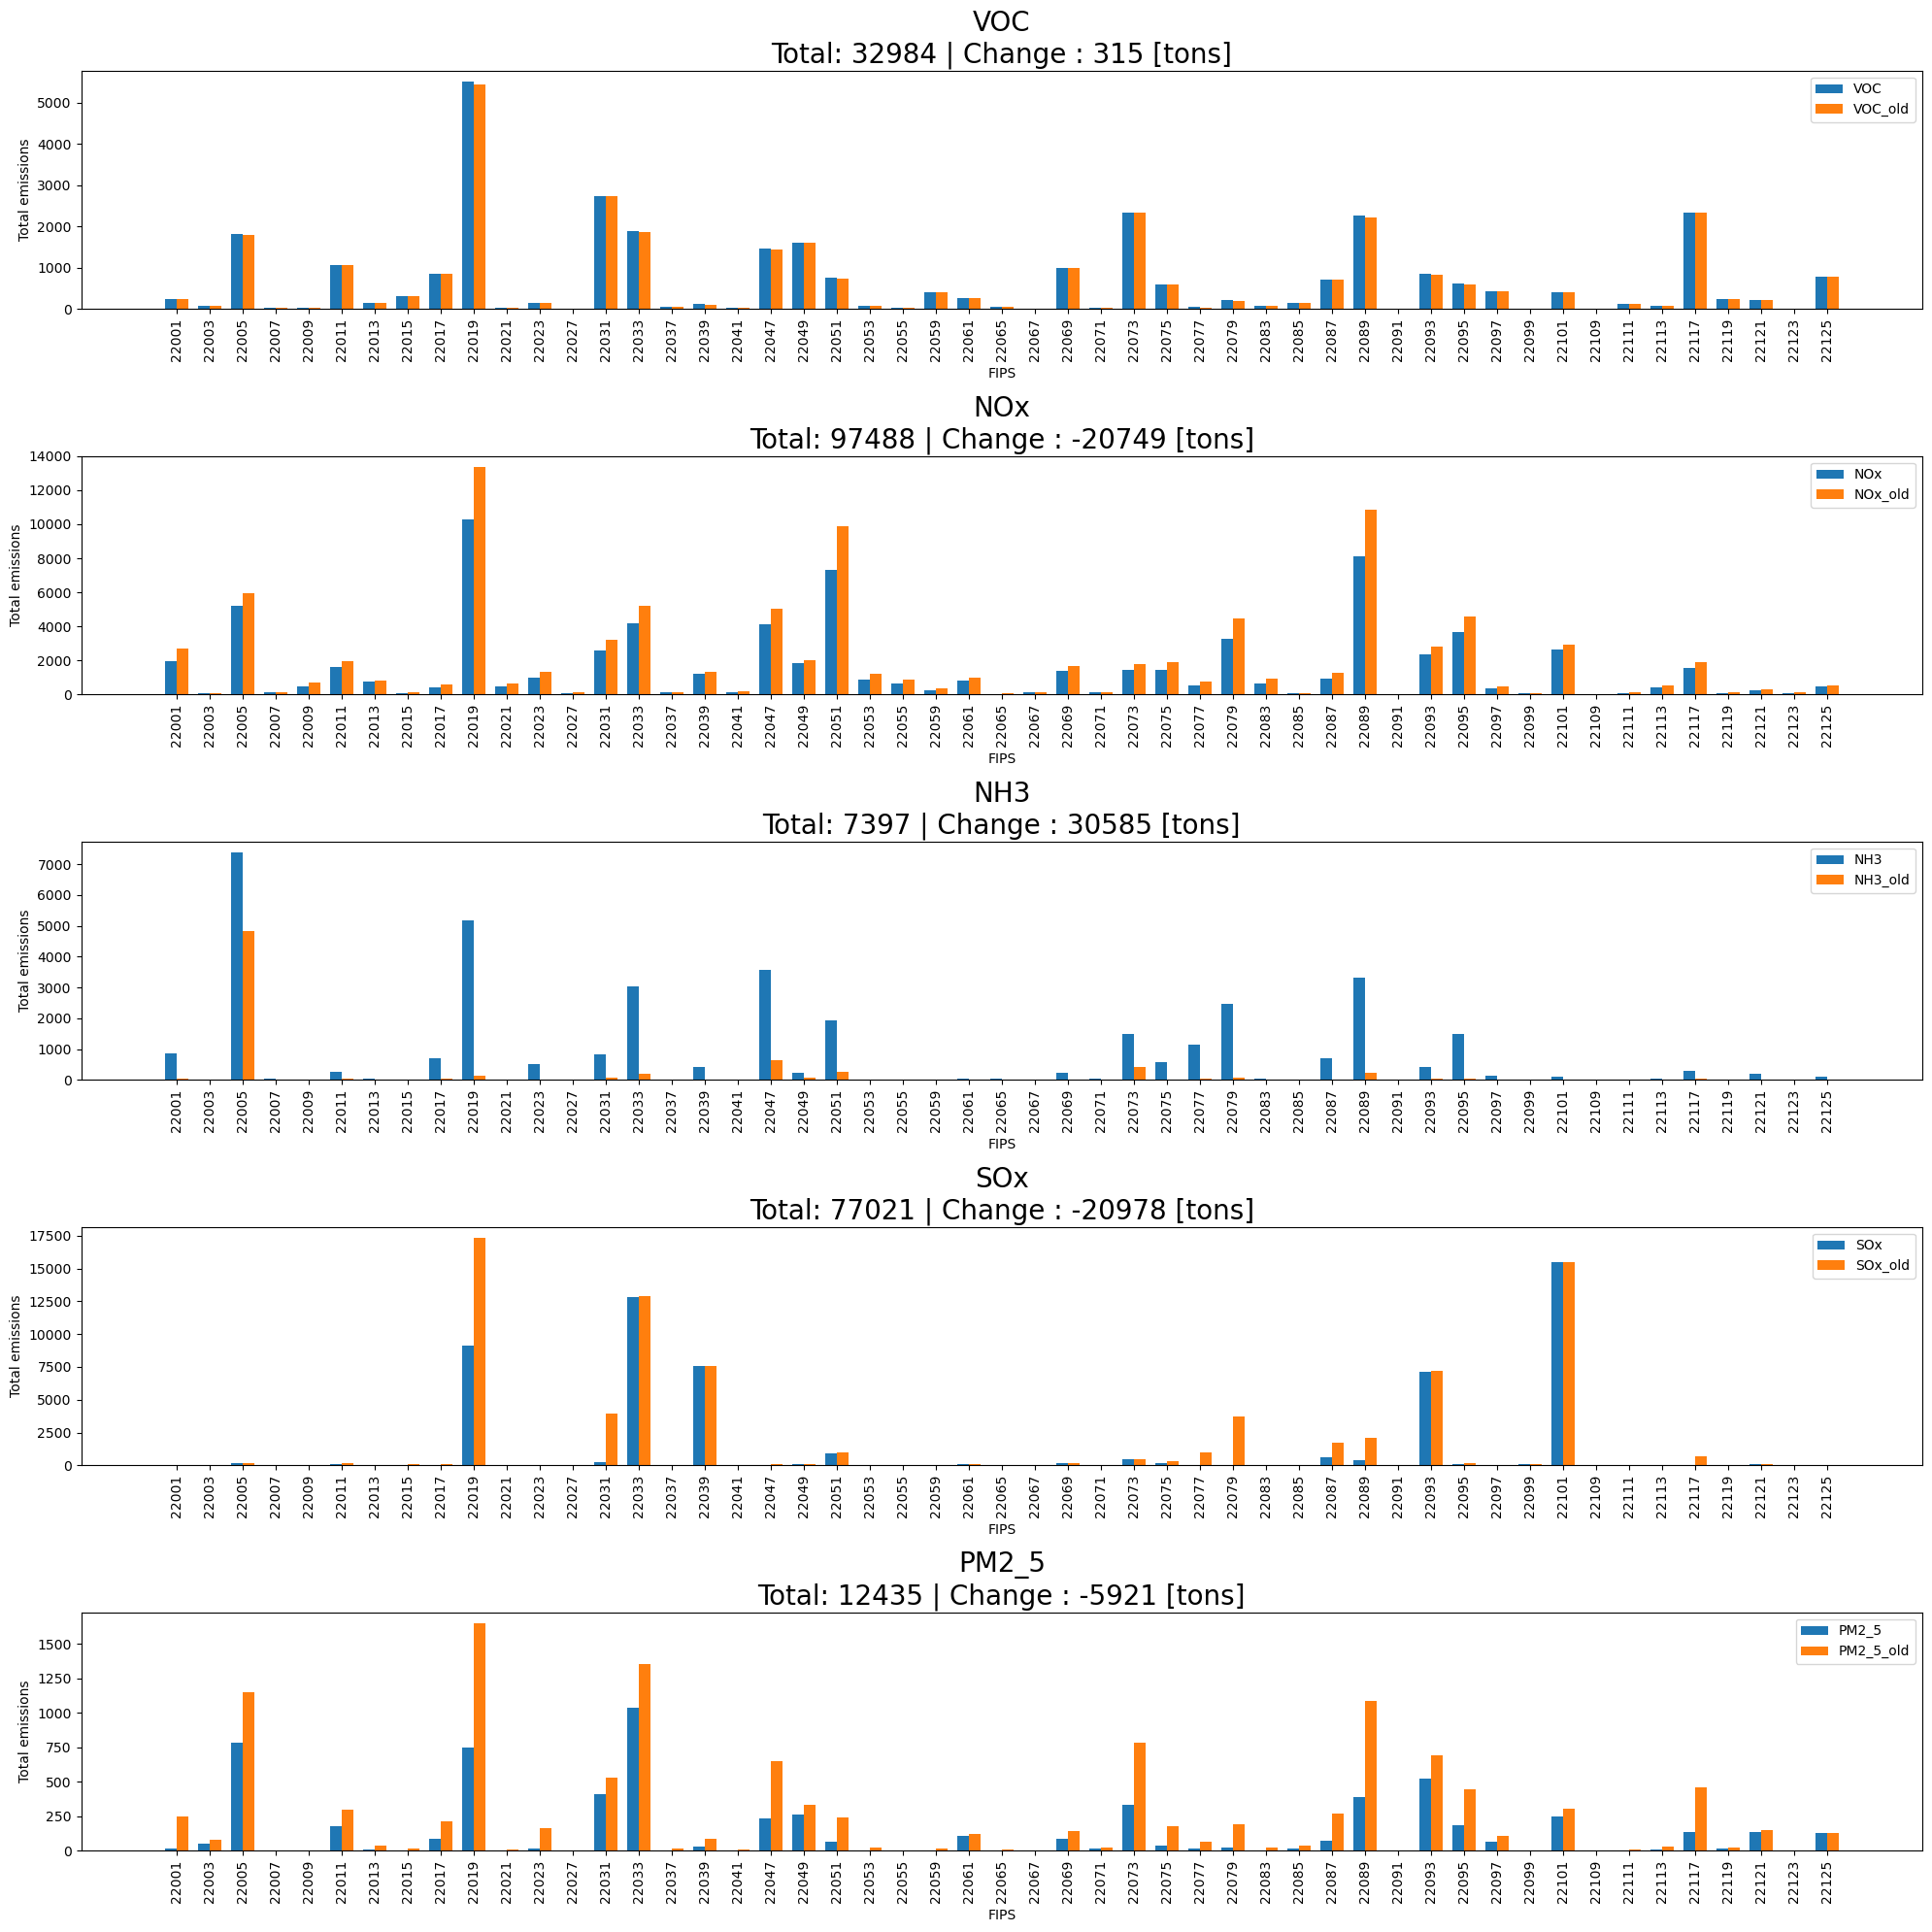

In [76]:
import numpy as np

# sum by FIPS
grouped_df = subset_df.drop(columns='geometry').groupby('FIPS').sum().reset_index()

pollutants = ['VOC', 'NOx', 'NH3', 'SOx', 'PM2_5']
pollutants_old = [f'{pollutant}_old' for pollutant in pollutants]

# Calculate total sums for each pollutant
totals = {pollutant: subset_df[pollutant].sum() for pollutant in pollutants_old}
totals_CCS ={pollutant: subset_df[pollutant].sum() for pollutant in pollutants}

# Plotting
fig, axes = plt.subplots(nrows=len(pollutants), ncols=1, figsize=(20, 20) ) #, sharey=True)
bar_width = 0.35  # Width of the bars
for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    indices = np.arange(len(grouped_df))
    # Plot CCS emissions
    ax.bar(indices, grouped_df[pollutant], bar_width, label=f'{pollutant}')
    
    # Plot NEI2020
    ax.bar(indices + bar_width, grouped_df[pollutants_old[i]], bar_width, label=f'{pollutants_old[i]}')
    
    total_original = totals[f'{pollutant}_old']
    total_new = totals_CCS[f'{pollutant}']
    ax.set_title(f'{pollutant}\nTotal: {total_original:.0f} | Change : {(total_new - total_original):.0f} [tons]', fontsize=20)
    ax.set_xlabel('FIPS')
    ax.set_ylabel('Total emissions')
    ax.set_xticks(indices + bar_width / 2)
    ax.set_xticklabels(grouped_df['FIPS'], rotation=90)
    ax.legend()

plt.tight_layout()
plt.show()

## 2. Data load

Fortunately, injuries during NFL games are quite rare, however for statistical analysis of the injury reasons it creates additional difficulties. With such low number of injuries it is usually difficult to conduct proper statistical analysis.
Even though data was collected over two full seasons, even 1-2 extra erroneous or missed injury records can drive significance of statistical tests. Out of **105** injury records (counting a double injury case) available, **28** do not have identifier of the corresponding play. Fortunately, we have the data about the game where each injury accured, so, in order to **preserve all injury information** available, we assign the last plays of these games as those which led to the injury. This allows us to conduct statistical analyses on all 105 injury records at hand.

In [2]:
DTYPE = np.float32
FREQ = 3

InjuryRecord = pd.read_csv('../input/nfl-playing-surface-analytics/InjuryRecord.csv')

PlayList = pd.read_csv('../input/nfl-playing-surface-analytics/PlayList.csv')
last_plays = PlayList.groupby('GameID')['PlayKey'].last()
InjuryRecord.loc[InjuryRecord['PlayKey'].isnull(), 'PlayKey'] = InjuryRecord['GameID'].map(last_plays)[InjuryRecord['PlayKey'].isnull()].values
InjuryRecord = InjuryRecord.groupby('PlayKey').first().reset_index()

PlayList = PlayList.merge(InjuryRecord[['PlayKey', 'DM_M1']], left_on='PlayKey', right_on='PlayKey', how='left')
PlayList['DM_M1'] = PlayList['DM_M1'].fillna(0)



PlayerTrackData = pd.read_csv('../input/nfl-playing-surface-analytics/PlayerTrackData.csv',\
                              usecols=["PlayKey", "time", "x", "y", "dir"],\
                              dtype={"time": DTYPE, "x": DTYPE, "y": DTYPE, "dir": DTYPE})
PlayerTrackData['time'] = (PlayerTrackData['time'] * 10).astype(np.int16)
PlayerTrackData = PlayerTrackData[PlayerTrackData['time'] % FREQ == 0]

gc.collect()

PlayerTrackData = PlayerTrackData.merge(PlayList[['PlayKey', 'RosterPosition']], left_on='PlayKey', right_on='PlayKey', how='left')
PlayerTrackData['sx'] = PlayerTrackData['x'].diff().astype(DTYPE) * 10 / FREQ
PlayerTrackData['sy'] = PlayerTrackData['y'].diff().astype(DTYPE) * 10 / FREQ
PlayerTrackData['s'] = np.sqrt(PlayerTrackData['sx']**2 + PlayerTrackData['sy']**2).astype(DTYPE)

PlayerTrackData['ax'] = PlayerTrackData['sx'].diff().astype(DTYPE)
PlayerTrackData['ay'] = PlayerTrackData['sy'].diff().astype(DTYPE)
PlayerTrackData['a'] = np.sqrt(PlayerTrackData['ax']**2 + PlayerTrackData['ay']**2).astype(DTYPE)

PlayerTrackData['sx_prev'] = PlayerTrackData['sx'].shift()
PlayerTrackData['sy_prev'] = PlayerTrackData['sy'].shift()
PlayerTrackData['s_prev'] = PlayerTrackData['s'].shift()

PlayerTrackData = PlayerTrackData[PlayerTrackData['time'] > FREQ].drop(['dir'], axis=1)

PlayerTrackData = PlayerTrackData.merge(PlayList[['PlayKey', 'PlayerKey', 'FieldType']], left_on='PlayKey', right_on='PlayKey')
PlayerTrackData = PlayerTrackData.merge(InjuryRecord[['PlayKey', 'DM_M1']], left_on='PlayKey', right_on='PlayKey', how='left')
PlayerTrackData['DM_M1'] = PlayerTrackData['DM_M1'].fillna(0)

gc.collect()

PlayerTrackData['cos_th'] = ((PlayerTrackData['ax']*PlayerTrackData['sx_prev'] + PlayerTrackData['ay']*PlayerTrackData['sy_prev']) / PlayerTrackData['a'] / PlayerTrackData['s_prev']).fillna(1)
PlayerTrackData['a_fwd'] = PlayerTrackData['a'] * PlayerTrackData['cos_th']
PlayerTrackData['a_sid'] = np.sqrt(PlayerTrackData['a']**2 - PlayerTrackData['a_fwd']**2)
PlayerTrackData['a_sid'] = PlayerTrackData['a_sid'].fillna(0) * np.sign(PlayerTrackData['ax']*PlayerTrackData['sy_prev'] - PlayerTrackData['ay']*PlayerTrackData['sx_prev'])


## Correcting the sample bias

The data provided is a sample of all players in NFL; unfortunately, most of the players who did not suffer any injuries are not available for analysis. However, to properly conduct statistical analytics, we need to account for frequencies of plays on artificial and natural turf. Though it does not have a major impact on statistical tests performed, the resulting injury frequencies are unrealistically high due to us having a rather balanced sample of injured and non-injured players. Therefore, in order to correct the numbers, we calculate a very rough correction term for missing non-injured players and plays. Assuming there are 53 players per team in 32 teams, we estimate there are 1696 players overall, while only 250 players are present in the data. So, for the correction term we assume there are extra 1446 = 1696 - 250 players with same data as non-injured players. We apply it to adjust estimates throughout this kernel if warranted.

In [3]:
corr_term = (32 * 53 - 250) / 250
print("Correction factor:", corr_term)

Correction factor: 5.784


## Playing surface impact on injuries

First, we study the fundamental question whether injury rates differ statistically between games played on artificial turf and natural grass.
An appropriate statistical test to identify if we can claim that players are more prone to injuries when they play on artificial turf is a **chi-squared test** (based on contingency table, other appropriate tests such as Fisher's exact test confirm obtained results). We run the test twice, once to assess how frequent the injuries are **per play**, and second - **per game**. Each test is performed once without and once with the bias correction factor.

In [4]:
def csq_test(df, grp=None, target='DM_M1', c_term=1):
    df0 = df[df[target] >= df.groupby('GameID')[target].cumsum()]
    
    if grp is not None:
        df0 = df0.groupby(grp)['FieldType', target].max().reset_index()
    
    cond = df0['FieldType'] == "Synthetic"

    e1 = df0[cond][target].sum()
    n1 = cond.sum() * c_term
    e2 = df0[~cond][target].sum()
    n2 = (~cond).sum() * c_term
    p_hat = (e1 + e2) / (n1 + n2)
    z = (e1/n1 - e2/n2) / np.sqrt(p_hat * (1-p_hat) * (1/n1 + 1/n2))

    return 1-norm.cdf(z), int(n1+n2), int(e1+e2)

res = csq_test(PlayList, c_term=1)
print(f"p-value by play {res[0]:<6.4f} ({res[2]} injuries from {res[1]} plays)")
res = csq_test(PlayList, grp='GameID', c_term=1)
print(f"p-value by game {res[0]:<6.4f} ({res[2]} injuries from {res[1]} games)")

res = csq_test(PlayList, c_term=corr_term)
print(f"Bias corrected p-value by play {res[0]:<6.4f} ({res[2]} injuries from {res[1]} plays)")
res = csq_test(PlayList, grp='GameID', c_term=corr_term)
print(f"Bias corrected p-value by game {res[0]:<6.4f} ({res[2]} injuries from {res[1]} games)")

p-value by play 0.0045 (104 injuries from 266505 plays)
p-value by game 0.0069 (104 injuries from 5712 games)
Bias corrected p-value by play 0.0045 (104 injuries from 1541464 plays)
Bias corrected p-value by game 0.0073 (104 injuries from 33038 games)


We can see that in both cases p-values are clearly below 0.01, allowing us to reject the null hypothesis and to claim that **the risk of an injury is significantly higher on artifical turf**. Let us further take a look at how injury risk grows when a player accumulates plays/games on artificial turf compared to natural grass. In order to do so, we run a **survival analysis model** using **Cox regression** with the surface type as the only predictor. We run 2 regressions - one is counting number of plays played on a certain type of surface, and the other is counting number of games.

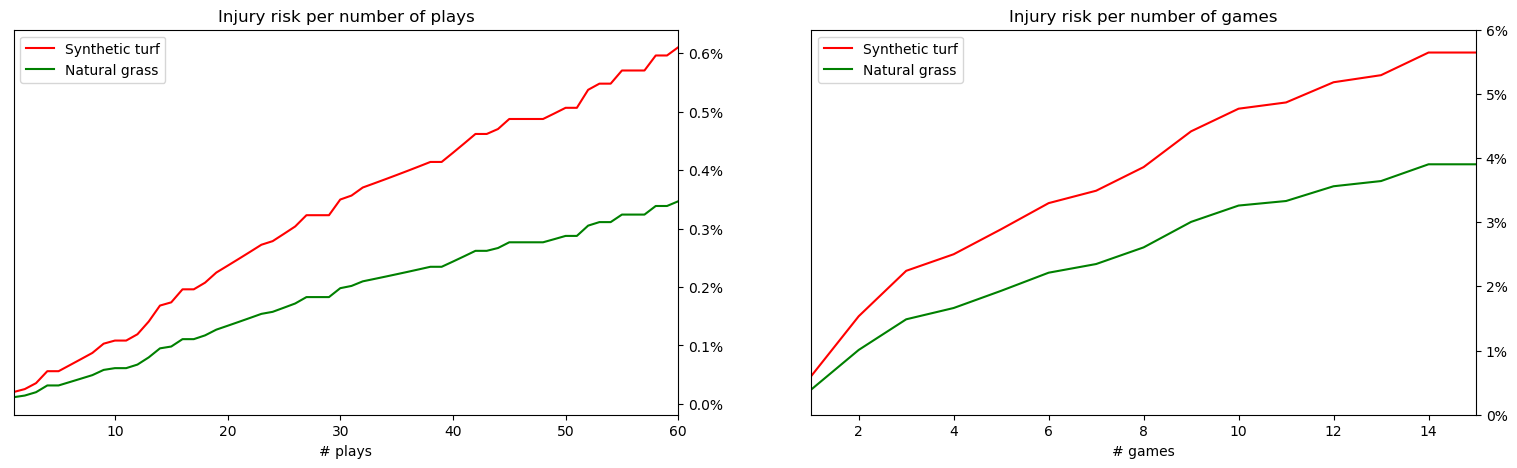

In [5]:
target = 'DM_M1'

# Stop at the first injury
df = PlayList[PlayList[target] >= PlayList.groupby('PlayerKey')[target].cumsum()]
df = df.groupby(['GameID']).last().reset_index()[['PlayerKey', 'PlayKey', 'PlayerGamePlay', target, 'FieldType']]
df['FieldSynthetic'] = (df['FieldType'] == "Synthetic").astype(int)
cph = CoxPHFitter()
cph.fit(df[['FieldSynthetic', 'PlayerGamePlay', target]], duration_col='PlayerGamePlay', event_col=target)

play_preds = (1 - cph.predict_survival_function(pd.DataFrame({"PlayerGamePlay":[0,0], "FieldSynthetic":[0,1]}))[:60]) / corr_term
play_preds.columns = ['Natural grass', 'Synthetic turf']


df = PlayList.groupby(['GameID'])[['PlayerKey', 'FieldType', 'PlayerGame', 'DM_M1']].max().reset_index().sort_values(['PlayerKey', 'PlayerGame'])
df = df[df[target] >= df.groupby('PlayerKey')[target].cumsum()]
df = df.groupby('GameID').last()
df = df.groupby(['PlayerKey', 'FieldType']).apply(lambda z: pd.DataFrame(\
    {"ngames":[len(z)], "DM_M1":[z['DM_M1'].max()]}\
    )).reset_index().drop(['level_2'], axis=1)
df['FieldSynthetic'] = (df['FieldType'] == "Synthetic").astype(int)
cph = CoxPHFitter()
cph.fit(df[['FieldSynthetic', 'ngames', 'DM_M1']], duration_col='ngames', event_col='DM_M1')

game_preds = (1 - cph.predict_survival_function(pd.DataFrame({"PlayerGamePlay":[0,0], "FieldSynthetic":[0,1]}))[:15]) / corr_term
game_preds.columns = ['Natural grass', 'Synthetic turf']


plt.style.use(['default'])
fig = plt.figure(figsize = (15, 5))

ax = plt.subplot(1, 2, 1)
play_preds[['Synthetic turf', 'Natural grass']].plot(colors=['red', 'green'], ax=ax)
ax.yaxis.tick_right()
plt.title('Injury risk per number of plays')
plt.xlabel('# plays')
#plt.ylabel('Injury risk')
ax.yaxis.set_label_position("right")
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])

ax = plt.subplot(1, 2, 2)
game_preds[['Synthetic turf', 'Natural grass']].plot(colors=['red', 'green'], ax=ax)
ax.yaxis.tick_right()
plt.title('Injury risk per number of games')
plt.xlabel('# games')
#plt.ylabel('Injury risk')
ax.yaxis.set_label_position("right")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.ylim((0, 0.06))

plt.subplots_adjust(right=1.1)

plt.show()

In the figures above, the x-axis depict the accumulating number of plays (left) and number of games (right), while the y-axis shows the injury risk for synthetic turf (red) and natural grass (green) as calculated by the survival model. 
As each individual game or play shows higher injury risk on artificial surface, as expected the risk also accumulates much faster over plays/games. **After 60 plays, the risk of an injury on synthetic turf is 0.6% vs. only 0.35% on natural grass.** Similarly, after 15 games, the risk of injury on artificial turf rises to 5.6%, while it is 4% on natural grass.

In [6]:
play_preds

,Natural grass,Synthetic turf
1.0,0.000114,0.000203
2.0,0.000143,0.000253
3.0,0.000200,0.000355
4.0,0.000316,0.000560
5.0,0.000316,0.000560
6.0,0.000374,0.000663
7.0,0.000433,0.000767
8.0,0.000492,0.000872
9.0,0.000582,0.001030
10.0,0.000612,0.001083


In [7]:
game_preds

,Natural grass,Synthetic turf
1.0,0.003925,0.006026
2.0,0.010097,0.015348
3.0,0.014870,0.022426
4.0,0.016632,0.025010
5.0,0.019313,0.028911
6.0,0.022134,0.032977
7.0,0.023485,0.034908
8.0,0.026078,0.038592
9.0,0.030053,0.044167
10.0,0.032598,0.047693


## Types of injuries

Injuries are mainly of two types: **knee** and **non-knee**, where latter is dominated by ankle injuries. 

In [8]:
print(InjuryRecord['BodyPart'].value_counts().to_string())

Knee     48
Ankle    41
Toes      7
Foot      7
Heel      1


Previous research [2] has indicated that ankle and foot injuries have particularly high increases of injury rates on artificial turf vs. natural grass which is what we aim to study next. Limited data available does not let us to confidently draw statistical conclusions by type of the injury. But it is sufficient to gain some interesting insights. 

In [9]:
print("Knee injuries")
PlayList2 = PlayList.merge(InjuryRecord[InjuryRecord['BodyPart'] == 'Knee'][['PlayKey', 'DM_M1']].rename({"DM_M1": "DM_M1_knee"}, axis=1), \
                           left_on='PlayKey', right_on='PlayKey', how='left')
PlayList2['DM_M1_knee'] = PlayList2['DM_M1_knee'].fillna(0)

print(f"\tOn synthetic turf {100*PlayList2[PlayList2['FieldType'] == 'Synthetic']['DM_M1_knee'].mean()/corr_term:6.4f}% per play, "\
      f"{100*PlayList2[PlayList2['FieldType'] == 'Synthetic'].groupby('GameID')['DM_M1_knee'].max().mean()/corr_term:4.2f}% per game")
print(f"\tOn natural grass  {100*PlayList2[PlayList2['FieldType'] != 'Synthetic']['DM_M1_knee'].mean()/corr_term:6.4f}% per play, "\
      f"{100*PlayList2[PlayList2['FieldType'] != 'Synthetic'].groupby('GameID')['DM_M1_knee'].max().mean()/corr_term:4.2f}% per game")
print()

res = csq_test(PlayList2, target='DM_M1_knee')
print(f"\tp-value by play {res[0]:<6.4f}")
#print(f"\tp-value by play {res[0]:<6.4f} ({res[2]} injuries from {res[1]} plays)")
res = csq_test(PlayList2, target='DM_M1_knee', grp='GameID')
print(f"\tp-value by game {res[0]:<6.4f}")
#print(f"\tp-value by game {res[0]:<6.4f} ({res[2]} injuries from {res[1]} games)")
print()


print("Non-knee injuries")
PlayList2 = PlayList.merge(InjuryRecord[InjuryRecord['BodyPart'] != 'Knee'][['PlayKey', 'DM_M1']].rename({"DM_M1": "DM_M1_knee"}, axis=1), \
                           left_on='PlayKey', right_on='PlayKey', how='left')
PlayList2['DM_M1_knee'] = PlayList2['DM_M1_knee'].fillna(0)

print(f"\tOn synthetic turf {100*PlayList2[PlayList2['FieldType'] == 'Synthetic']['DM_M1_knee'].mean()/corr_term:6.4f}% per play, "\
      f"{100*PlayList2[PlayList2['FieldType'] == 'Synthetic'].groupby('GameID')['DM_M1_knee'].max().mean()/corr_term:4.2f}% per game")
print(f"\tOn natural grass  {100*PlayList2[PlayList2['FieldType'] != 'Synthetic']['DM_M1_knee'].mean()/corr_term:6.4f}% per play, "\
      f"{100*PlayList2[PlayList2['FieldType'] != 'Synthetic'].groupby('GameID')['DM_M1_knee'].max().mean()/corr_term:4.2f}% per game")
print()

res = csq_test(PlayList2, target='DM_M1_knee')
print(f"\tp-value by play {res[0]:<6.4f}")
#print(f"\tp-value by play {res[0]:<6.4f} ({res[2]} injuries from {res[1]} plays)")
res = csq_test(PlayList2, target='DM_M1_knee', grp='GameID')
print(f"\tp-value by game {res[0]:<6.4f}")
#print(f"\tp-value by game {res[0]:<6.4f} ({res[2]} injuries from {res[1]} games)")
print()

Knee injuries
	On synthetic turf 0.0038% per play, 0.17% per game
	On natural grass  0.0026% per play, 0.13% per game

	p-value by play 0.1088
	p-value by game 0.1308

Non-knee injuries
	On synthetic turf 0.0050% per play, 0.23% per game
	On natural grass  0.0026% per play, 0.13% per game

	p-value by play 0.0078
	p-value by game 0.0107



We see that both groups show increased injury frequency on synthetic turf, allowing us to conclude that the analysis are not dominated by either of the two. From here onward we will not split the injuries by type.

However another conclusions is clear from the numbers above: **artificial turf elevates the risk of non-knee (ankle, foot) injuries significantly more**. Even the collected number of records is sufficient to claim the statistical significance on this sub-group of injuries alone. It is aligned with the assumption that synthetic surface is "harder" and it puts more "stress" on ankles during the game. It is also worth pointing out that a lower increase in frequency of knee injuries might have the same root causes. Increased "pressure" on ankles might be the reason of higher knee injury risk.

P-values observed are unstable due to low number of recorded cases. When the analysis will be repeated after 1-2 extra seasons of data, we expect p-values of both types of injuries to drop below 0.01. 

## Switching the surface

It is a common observation in sports medicine for players to report more discomfort after the switch from natural surface to an artificial one. As a simplified analysis, a quick check of injury rates split by the surface type of preceding game shows interesting numbers. 

In [10]:
df = PlayList.groupby(['GameID'])[['PlayerKey', 'FieldType', 'PlayerGame', 'DM_M1']].max().reset_index()
df = df[df['DM_M1'] >= df.groupby('PlayerKey')['DM_M1'].cumsum()]
df = df.groupby('GameID').last().reset_index().sort_values(['PlayerKey', 'PlayerGame'])

df['pred_type'] = df['FieldType'].shift()
df = df[df['PlayerGame'] > 1]

df0 = PlayList[PlayList['FieldType'] == 'Synthetic'].groupby('GameID')[['FieldType', 'DM_M1']].max().reset_index()
print(f"Frequency on synthetic {100*df0['DM_M1'].mean() / corr_term:4.2f}% per game, "\
      f"{100*PlayList[PlayList['FieldType'] == 'Synthetic']['DM_M1'].mean() / corr_term:6.4f}% per play "
      f"({int(df0['DM_M1'].sum())} injuries in {int(df0['DM_M1'].count() * corr_term)} games)")
df0 = PlayList[PlayList['FieldType'] != 'Synthetic'].groupby('GameID')[['FieldType', 'DM_M1']].max().reset_index()
print(f"Frequency on natural   {100*df0['DM_M1'].mean() / corr_term:4.2f}% per game, "\
      f"{100*PlayList[PlayList['FieldType'] != 'Synthetic']['DM_M1'].mean() / corr_term:6.4f}% per play "
      f"({int(df0['DM_M1'].sum())} injuries in {int(df0['DM_M1'].count() * corr_term)} games)")
print()

for f_type in df['FieldType'].unique():
    print(f"Previous game on {f_type}")
    
    df1 = df[df['pred_type'] == f_type]
    df0 = df1[df1['FieldType'] == 'Synthetic']
    print(f"\tSynthetic {100*df0['DM_M1'].mean() / corr_term:4.2f}% ({int(df0['DM_M1'].sum())} injuries in {int(df0['DM_M1'].count() * corr_term)} games)")
    df0 = df1[df1['FieldType'] != 'Synthetic']
    print(f"\tNatural   {100*df0['DM_M1'].mean() / corr_term:4.2f}% ({int(df0['DM_M1'].sum())} injuries in {int(df0['DM_M1'].count() * corr_term)} games)")
    print()

Frequency on synthetic 0.40% per game, 0.0088% per play (56 injuries in 13887 games)
Frequency on natural   0.25% per game, 0.0053% per play (48 injuries in 19150 games)

Previous game on Synthetic
	Synthetic 0.39% (21 injuries in 5327 games)
	Natural   0.21% (12 injuries in 5812 games)

Previous game on Natural
	Synthetic 0.53% (31 injuries in 5899 games)
	Natural   0.31% (30 injuries in 9566 games)



We indeed see that **frequency of injuries on synthethic turf are higher when the preceeding game took place on natural grass**. It might be explained that players who had practice on "harder" surfaces are able to better adjust the posture to the surface. However, further research is warranted to study this artefact in more detail.

## Deeper look by player positions

Next, we are interested in studying how injury rates differ after splitting by player positions.

In [11]:
df = PlayList.groupby("GameID")[['DM_M1', 'FieldType', 'RosterPosition']].max().reset_index()
stat = df.groupby('RosterPosition', group_keys=True).apply(lambda z: pd.DataFrame(\
    {"# plays":[len(z)],
     "# injuries":[z['DM_M1'].sum().astype(int)],
     "Inj Natural":[z[z['FieldType'] != "Synthetic"]['DM_M1'].mean()/corr_term],
     "Inj Synthetic":[z[z['FieldType'] == "Synthetic"]['DM_M1'].mean()/corr_term],
     "p-value":[csq_test(df[df['RosterPosition'] == z['RosterPosition'].values[0]])[0]]
    }\
    )).reset_index().drop(['level_1'], axis=1).\
    sort_values("# plays", ascending=False)

stat['p-value'] = stat['p-value'].round(3)
stat["Inj Synthetic"] = stat["Inj Synthetic"].round(6)
stat["Inj Natural"] = stat["Inj Natural"].round(6)
stat["Inj diff"] = ((stat["Inj Synthetic"] / stat["Inj Natural"]).round(2) - 1).fillna(0)

#print(stat.to_string(index=False))
stat.reset_index(drop=True).style.format({
    "Inj Natural": '{:,.2%}'.format,
    "Inj Synthetic": '{:,.2%}'.format,
    "Inj diff": '+{:,.0%}'.format,
})


,RosterPosition,# plays,# injuries,Inj Natural,Inj Synthetic,p-value,Inj diff
0,Linebacker,1101,23,0.34%,0.40%,0.334,+20%
1,Wide Receiver,947,23,0.33%,0.53%,0.132,+58%
2,Offensive Lineman,820,7,0.14%,0.16%,0.415,+18%
3,Safety,781,15,0.32%,0.35%,0.41,+12%
4,Defensive Lineman,721,9,0.18%,0.26%,0.271,+50%
5,Cornerback,573,12,0.10%,0.73%,0.001,+604%
6,Running Back,396,9,0.31%,0.49%,0.244,+58%
7,Tight End,194,6,0.38%,0.88%,0.145,+129%
8,Quarterback,110,0,0.00%,0.00%,nan,+0%
9,Kicker,69,0,0.00%,0.00%,nan,+0%


Firstly, **injuries on artifical turf are more frequent for each player's position**. That brings us to an important conclusion - the higher risk of injuries on artificial turf affects players of every role. In other words, it does not matter if a player is sprinting, rushing through the defensive line or trying to tackle or block an opponent - we see an elevated risk of injury.

However, **the magnitude of the effect depends on a player's position** as imminent from the varying differences between synthetic and natural injury rates per roster position. Turf type has the most significant impact on injuries of **Cornerbacks**, with the disclaimer of having only 12 records of injuries to judge. However, even with such low numbers we see a statistically significant effect (p-value below 0.01) as almost all the recorded injuries happened on artificial turf. Out of the positions with higher number of observations, we see **Wide Receivers** suffering injuries almost 60% more frequently on artificial turf compared to natural grass, with the second lowest p-value. WR and CB injury risk is also correlated with type of the play, as they get more injuries during passing plays where they are more involved, than during rushing plays. 

In [12]:
df = PlayList[['PlayType', 'RosterPosition', 'DM_M1']].copy()
df['PlayType'] = df['PlayType'].apply(lambda x: str(x).split()[0])
df = df[\
    np.logical_and(df['PlayType'].apply(lambda x: str(x)[:7]).isin(['Pass', 'Rush', 'Kickoff']), \
                   df['RosterPosition'].isin(['Cornerback', 'Wide Receiver']))]\
    .groupby(['RosterPosition', 'PlayType']).apply(lambda z: pd.DataFrame(\
    {"# plays":[len(z)],
     "# injuries":[z['DM_M1'].sum().astype(int)],
     "Injuries freq":[z['DM_M1'].mean()/corr_term]
    }\
    ))

df["Injuries freq"] = df["Injuries freq"].round(7)

df.style.format({
    "Injuries freq": '{:,.4%}'.format,
})


## Player movement data

The provided data gives rich information about players' movements: directions, speed, acceleration. One of the main questions of our work is to study effects of player movement on injury rates with a specific focus on differences between playing surfaces. Based on our initial insights in differences between player positions, we expect the movement profile to also depend on a player's position. For example, we expect higher speed and accelerations from WR and CB compared to other positions. To confirm this, we report a simple initial analysis differentiating speed by player position and conduct most of our remaining experiments split by roster position.

In [13]:
df = PlayerTrackData.groupby('PlayKey')[['RosterPosition', 's', 'a', 'a_fwd', 'a_sid', 'DM_M1', 'FieldType']].max().reset_index()

This is an example of how maximum speed per play is differently distributed for some positions.

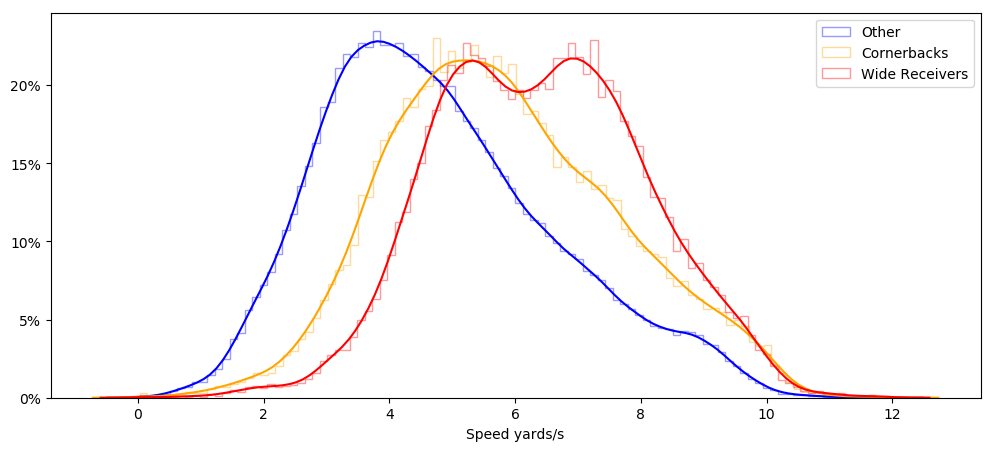

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ft = 's'
nbins = 100

plt.style.use(['default'])
fig = plt.figure(figsize = (12, 5))


df0 = df[df[ft] <= 12]

sns.distplot(df0[~df0['RosterPosition'].isin(['Cornerback', 'Wide Receiver'])][ft], kde=True, norm_hist=True, bins=nbins, hist_kws={"histtype": "step"}, color='blue', label='Other')
sns.distplot(df0[df0['RosterPosition'] == 'Cornerback'][ft], kde=True, norm_hist=True, bins=nbins, hist_kws={"histtype": "step"}, color='orange', label='Cornerbacks')
sns.distplot(df0[df0['RosterPosition'] == 'Wide Receiver'][ft], kde=True, norm_hist=True, bins=nbins, hist_kws={"histtype": "step"}, color='red', label='Wide Receivers')

ax = fig.axes[0]
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.xlabel("Speed yards/s")
plt.ylabel("")
plt.legend()

plt.show()

## Play model

Based on our initial insights, we are interested in now studying whether players' movement patterns have predictive power on certain aspects of a play. To that end, we introduce a **flexible neural network** allowing us to **model movement trajectories** in order to **predict arbitrary aspects of a play**. 

The following figure depicts the general architecture of the network. We represent each individual play as a sequence of features over the course of of the trajectory taken (left-hand part of the figure). 
The x-axis represents the individual movement frames at consideration; in our experiments we cut the trajectories after 200 frames. Each frame at interest represents one element of the sequence, and each element can have multiple features which are depicted on the y-axis. We only consider **speed** and **acceleration** based properties of a trajectory, but the data can be arbitrarily extended to other types of features in straight-forward fasion (such as orientation, position, etc.). As an example, the red element of the matrix, captures the acceleration of the player after the third frame at consideration in the movement trajectory of respective play.

On this data representation, the model applies a convolutional layer with a kernel size of 50 and a dimension of 64. This is followed by activation, batch normalization, and average pooling. The final step is then to apply a typical linear layer, and to have the final target classes as outputs. In this visualization, the target consists of three individual classes, but this can be adapted according to the prediction task at hand and we will utilize different targets throughout our experiments shown next.

![Neural Network Architecture](https://i.imgur.com/kuxIzQL.png)

For each of the following experiments, we sample at maximum 10,000 individual plays and run 4-fold player-based cross-validation, meaning that plays of a single player will not overlap between training and validation folds to avoid any leakage. We always report full out-of-fold classification accuracy as well as responsing baseline accuracy always predicting the majority class.

In [15]:
nbags = 1
n_epochs = 50
nfolds = 4

def preprocess(df_base, inplace=False):
    if inplace:
        df = df_base
    else:
        df = df_base.copy()
    
    return df

def pad_sequences(seq, pad=500):

    seq = [i[:pad] for i in seq]
    seq = np.array([i + [-1.]*(pad-len(i)) for i in seq])
    return seq

class FE(BaseEstimator, TransformerMixin):
    def fit(self, train, *_):
        
        return self
    
    def transform(self, df_base, *_):
        
        D_TYPE = np.float32
        df = df_base.copy()
        
        res = {}
        
        pad = 200
        
        s = pad_sequences(df["s"].values)
        a = pad_sequences(df["a"].values)
        sx = pad_sequences(df["sx"].values)
        sy = pad_sequences(df["sy"].values)
        ax = pad_sequences(df["ax"].values)
        ay = pad_sequences(df["ay"].values)
        
        res['sequence'] = np.stack([s, a, sx, sy, ax, ay], axis=2)        
        
        res['target'] = df["target"]

        return res
    


class OwnSampler(torch.utils.data.sampler.Sampler):
    def __init__(self, idx):
        self.idx = idx
    def __iter__(self):
        return iter(self.idx)
    def __len__(self):
        return len(self.idx)

class NFLDataset(Dataset):
    def __init__(self, data,  ds="train", mode="default"):
        fe = FE().fit(data)
            
        self.mode=mode
        
        self.xkeys = ['sequence']
        self.data = fe.transform(data)

        self.num_classes = len(data.target[0])
        self.ds = ds
        self.num_features = {}
        for k in self.xkeys:
            self.num_features[k] = self.data[k].shape[1:]
        
    def __len__(self):
        return len(self.data['target'])

    def __getitem__(self, idx):
        
        if self.mode == "default":
            data = self.data

        row = {k:data[k][idx] for k in self.xkeys}
        
        if self.ds == "train":
            target = np.array(data["target"][idx])
        else:
            target = 0
        
        return {**row, 'target': target}
    
dim = 64

class MyModel(nn.Module):
    def __init__(self, ds_train):
        super(MyModel, self).__init__()
        
        self.cnn = torch.nn.Sequential(
            torch.nn.Conv1d(ds_train.num_features['sequence'][1], dim, 50),
            torch.nn.ReLU(),
            nn.BatchNorm1d(dim, eps=1e-05, momentum=0.1, affine=True),
        )

        self.classifier = torch.nn.Sequential(
            
            torch.nn.Linear(dim, dim),
            torch.nn.ReLU(),
            nn.BatchNorm1d(dim, eps=1e-05, momentum=0.1, affine=True),

            torch.nn.Linear(dim, ds_train.num_classes),

            )
        
    def forward(self, sequence):
        
        sequence = sequence
        
        x = self.cnn(sequence.permute(0,2,1)).permute(0,2,1)
        
        x = F.avg_pool2d(x,(x.shape[1],1)).squeeze(1)
        
        return self.classifier(x)

    
def fit_nn(trn_idx, val_idx, ds_train, ds_val_default, y_train, fold, bag, seed):
        
    torch.manual_seed(seed)
    
    valid_sampler = OwnSampler(val_idx)
    valid_loader = torch.utils.data.DataLoader(ds_val_default, batch_size=64, num_workers=0, sampler=valid_sampler, pin_memory=True)

    train_sampler = torch.utils.data.sampler.SubsetRandomSampler(trn_idx)
    train_loader = torch.utils.data.DataLoader(ds_train, batch_size=128, num_workers=0, sampler=train_sampler, pin_memory=True, drop_last=True)
    
    model = MyModel(ds_train)
    
    model = model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCEWithLogitsLoss()

    best_score = 0
    best_preds = None
    best_epoch = -1

    start_time = time.time()
    for epoch in range(n_epochs):
        
        s = time.time()

        model.train()
        avg_train_loss = 0
        optimizer.zero_grad()
        
        for idx, data in enumerate(train_loader):
            
            
            
            X = {k:data[k].to(device).float() for k in ds_train.xkeys}
            y = data['target'].to(device).float()

            preds = model(**X)

            loss = criterion(preds, y) 

            loss.backward()

            optimizer.step()
            optimizer.zero_grad()
            avg_train_loss += loss.detach().cpu().numpy() / len(train_loader)


        avg_val_loss = 0
        model.eval()
        all_preds = []
        for idx, data in enumerate(valid_loader):
            X = {k:data[k].to(device).float() for k in ds_train.xkeys}
            y = data['target'].to(device).float()

            preds = model(**X)
            loss = criterion(preds, y) 
            avg_val_loss += loss.detach().cpu().numpy() / len(valid_loader) 
            all_preds.append(preds.detach().cpu())

        all_preds = np.vstack(all_preds)
        
        score = accuracy_score(np.argmax(y_train[val_idx], axis=1), np.argmax(all_preds, axis=1))

        
        if score >= best_score:
            best_score = score
            best_preds = all_preds
            best_epoch = epoch
            #torch.save(model.state_dict(), f"{fold}_{bag}.pt")

        #print(f"{fold:1}:{epoch:2} avg_train_loss {avg_train_loss:<8.4f} avg_val_loss {avg_val_loss:<8.4f} val_accuracy {score:<8.4f}  {time.time()-s:<2.2f}")

    #print(f"fold {fold:1} best {best_score:<8.6f} {best_epoch:3}, {(time.time()-start_time) / n_epochs:<2.2f} s/ep")
    return best_preds, val_idx

In [16]:
df = pd.DataFrame(columns=["Roster position", "Accuracy", "Baseline accuracy"])
def run_model(roster=["Wide Receiver", "Cornerback", "Running Back"], target="RosterPosition", df=None, verbose=True):
    
    np.random.seed(seed=42)
    train = PlayerTrackData[PlayerTrackData.RosterPosition.isin(roster)]
    n_targets = train.RosterPosition.nunique()

    #print(train.RosterPosition.unique())

    try:
        sample = np.random.choice(train.PlayKey.unique(), size=10_000, replace=False)
    except:
        sample = train.PlayKey.unique()

    train = train[train.PlayKey.isin(sample)]

    train["target"] = list(OneHotEncoder(sparse=False).fit_transform(train[target].values.reshape(-1,1)))

    train_agg = train.groupby("PlayKey").agg({'s': lambda x: list(x), 
                                              'a': lambda x: list(x),
                                                'sx': lambda x: list(x), 
                                              'sy': lambda x: list(x), 
                                              'ax': lambda x: list(x), 
                                              'ay': lambda x: list(x), 
                                              'target': lambda x: list(np.mean(x)), 
                                              'PlayerKey': lambda x: max(x)})

    y_train = np.array([np.array(x) for x in train_agg['target'].values])
    
    

    train_processed = preprocess(train_agg, inplace=True)
    ds_train = NFLDataset(train_processed, ds="train", mode="default")

    ds_val_default = copy(ds_train)
    ds_val_default.mode = "default"

    ds_train.num_features

    kf = GroupKFold(n_splits = nfolds)

    start_time = time.time()

    res = Parallel(n_jobs=-1, temp_folder="/tmp", max_nbytes=None, backend="multiprocessing")( \
        delayed(fit_nn)(trn_idx, val_idx, ds_train, ds_val_default, y_train, fold, bag, np.random.randint(100_000)) \
        for fold, (trn_idx, val_idx) in enumerate(kf.split(np.arange(len(train_agg)), groups=train_agg.PlayerKey.values)) \
        for bag in range(nbags))

    from scipy.special import softmax

    oof = np.zeros((len(train_agg), y_train.shape[1]))

    for val, idx in res:
        oof[idx] += softmax(np.array(val), axis=1) / nbags
        
    y_true = np.argmax(y_train,axis=1)
    y_pred = np.argmax(oof, axis=1)
    
    if verbose:
        print("Baseline accuracy:", y_train.mean(axis=0).max())
        print("Full CV Accuracy: {:<8.4f}".format(accuracy_score(y_true, y_pred)))
  
    
    if df is not None:
        df = df.append({"Roster position": roster[0], "Accuracy":  accuracy_score(y_true, y_pred),
                        "Baseline accuracy": y_train.mean(axis=0).max()}, ignore_index=True)
    
    if df is not None:
        return df

To demonstrate the functionality and general predictive power of our model, we first **predict a player's roster position** (limited to *Wide Receiver*, *Cornerback*, and *Running Bac*k) just based on observing speed and acceleration of the corresponding movement trajectory where we already showed earlier that differences in movement patterns seem to exist. 

In [17]:
run_model(roster=["Wide Receiver", "Cornerback", "Running Back"], target="RosterPosition")

Baseline accuracy: 0.5147
Full CV Accuracy: 0.7772  


The results showcase clear predictive power getting close to ~80% accuracy which is significantly higher than a simple baseline accuracy of ~51%. This corroborates our findings from above that player movement patterns differ between separate player positions, even when one just looks at speed and acceleration based features. At the same time, this experiment **demonstrates the usefulness of our proposed neural network model**.

Coming back to one of the main questions of this analytics report, we want to further understand effects between players' movements and injury rates on different types of surfaces. We have already shown that there is a significantly higher injury rate on plays on artificial turf vs. those on natural turf. While we have also showcased that this effect exists across player roles, the prevalance of it is different across various roles. At the same time, we know that players' movement patterns clearly differ between distinct types of players.

Directly predicting if a play leads to an injury is not appropriate due to the very low number of events. However, one of our main questions is 
 **if players' movements show different patterns across playing surfaces** for which we have a lot of data available. To that end, we utilize our flexible model and attempt to **predict the surface just by looking at players' trajectories**. We start by considering all roster positions and predict a play's surface.

In [18]:
run_model(roster=PlayList.RosterPosition.unique(), target="FieldType")

Baseline accuracy: 0.5847
Full CV Accuracy: 0.5897  


We can clearly see that we are unable to outperform a simple baseline model, meaning that most of the trajectory based movement patterns hold no signal in order to predict the surface of a pitch. Based on our insights from above, we now attempt to predict the surface for different roster positions separately.

In [19]:
df = run_model(roster=["Linebacker"], target="FieldType", df=df, verbose=False)
df = run_model(roster=["Offensive Lineman"], target="FieldType", df=df, verbose=False)
df = run_model(roster=["Wide Receiver"], target="FieldType", df=df, verbose=False)
df = run_model(roster=["Safety"], target="FieldType", df=df, verbose=False)
df = run_model(roster=["Defensive Lineman"], target="FieldType", df=df, verbose=False)
df = run_model(roster=["Cornerback"], target="FieldType", df=df, verbose=False)
df = run_model(roster=["Running Back"], target="FieldType", df=df, verbose=False)

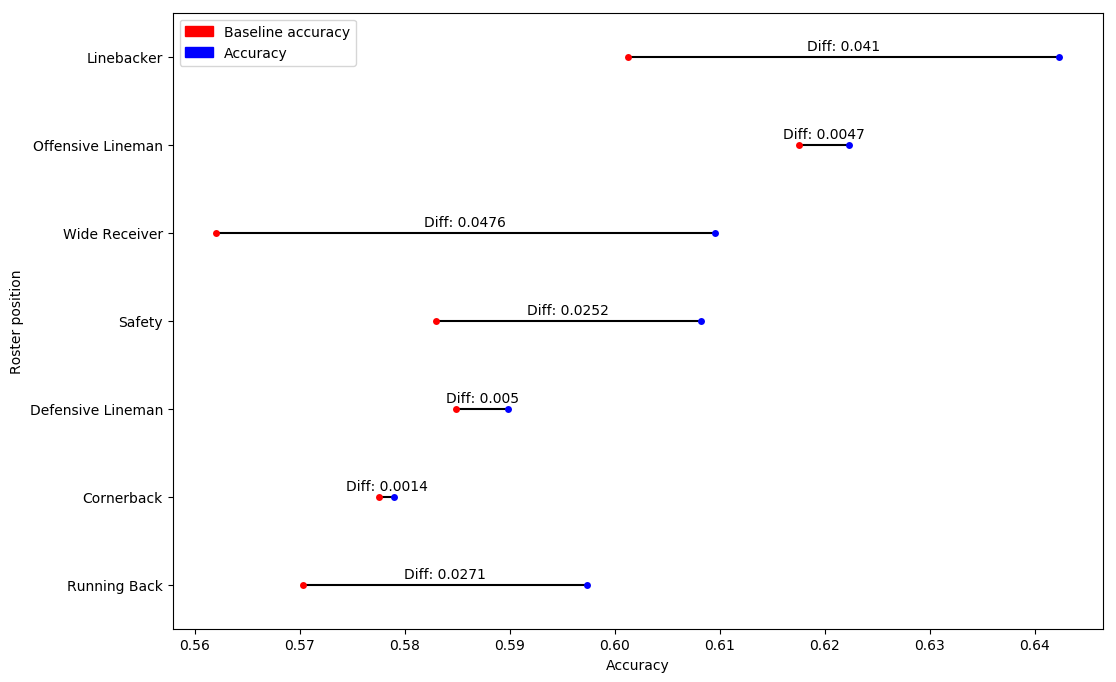

In [20]:
plt.style.use(['default'])
plt.figure(figsize = (12, 8))

sns.swarmplot(x="Baseline accuracy", y="Roster position", data=df, color="red")
sns.swarmplot(x="Accuracy", y="Roster position", data=df, color="blue")

for i in range(len(df)):
    plt.plot([df.iloc[i]["Baseline accuracy"], df.iloc[i]["Accuracy"]], [i,i], color="black")
    t = f'Diff: {np.round((df.iloc[i]["Accuracy"]-df.iloc[i]["Baseline accuracy"]),5)}'
    plt.annotate(t, xy=(df.iloc[i]["Baseline accuracy"]+(df.iloc[i]["Accuracy"]-df.iloc[i]["Baseline accuracy"])/2, i-0.07), ha='center')

p1 = mpatches.Patch(color='red', label='Baseline accuracy')
p2 = mpatches.Patch(color='blue', label='Accuracy')
p = plt.legend(handles=[p1,p2])

This figure presents the summarized accuracy results (x-axis) of running the model of predicting the type of surface for each player role separately (y-axis). Again, we contrast the majority baseline accuracy (red) with the actual achieved accuracy (blue); the lines depict the difference in accuracy. While we can see minor improvements over baseline accuracy, we can at maximum see an improvement of ~5% over the baseline accuracy which is not enough to justify any significant predictive effect and we would rather account it to certain noise in the movement patterns. In the experiment above where we predicted the player role, effects where much stronger and supportive of the hypothesis. However, the slight differences between player roles warrant future investigations with more data. The benefit of our proposed model is its flexibility and that it can be also utilized to study different objectives when looking at player trajectories and also incorporate different features.

To summarize, we cannot find any strong signal in the data for predicting the surface. We thus **cannot find any evidence that players' movement patterns significantly differ between different surfaces** meaning that players do not appear to adapt their behavior based on the type of pitch they play on.

Some observations suggest (but of course, do not claim) that the surface type impacts micro details of player's movement, which might include posture, placement of the feet while running and so on. A single game on synthetic turf might be sufficient for a professional player to adjust such micro details to have a significant impact on the injury risk. In order to test this assumption, more detailed data about players movements is required, such as further sensor data of player movement patterns related to the foot. Also, it would be valuable to access practising data of players in order to study these and similar effects in greater detail.

### Further remarks

* This kernel currently runs on GPU environment. You can easily change the kernel to run on CPU environment by changing the device variable to ``device = "cpu"``. Commenting some of the neural network runs out will also speed up the runtime of the kernel.
* While simple analyses on weather data did not reveal any interesting facets to report, we found that movement patterns do not differ significantly across weather conditions by applying our machine learning play model to predict weather. 
* Another way to split the data is by type of play (rush, pass, etc.). However, the data correlates with player roles and we could not find any interesting additional effects next to those reported.
* We believe that these and similar artefacts of plays can be further studied with our introduced neural network model. There is also still quite some room to improve predictions by e.g., tuning (i) the network architecture, (ii) learning procedure, or (iii) utilized features. For example, in some experiments we replaced the CNN layer with an LSTM layer showcasing similar performance, combining these two types of layers might improve predictive power of the model further. Also, for now we have only considered speed and acceleration based features to not introduce any position-based leakages to the model. Carefully investigating these and other properties of movement such as orientation or direction seems worthy to study in future.

### References

1. https://www.lawnstarter.com/blog/sports-turf/nfl-mlb-teams-artificial-turf-2019/
2. Mack C, Hershman E, Anderson R, et al. Higher rates of lower extremity injury on synthetic turf compared with natural turf among National Football League athletes: epidemiologic confirmation of a biomechanical hypothesis [published online November 19, 2018]. Am J Sports Med. doi:10.1177/0363546518808499
3. Loughran, Galvin J., et al. "Incidence of knee injuries on artificial turf versus natural grass in National Collegiate Athletic Association American football: 2004-2005 through 2013-2014 seasons." The American journal of sports medicine 47.6 (2019): 1294-1301.
4. Kent, Richard, et al. "The mechanics of American football cleats on natural grass and infill-type artificial playing surfaces with loads relevant to elite athletes." Sports biomechanics 14.2 (2015): 246-257.
5. https://orthoinfo.aaos.org/en/diseases--conditions/turf-toe